In [1]:
import pandas as pd
import utils_comp as utils
import utils_max_flow
import utils_centrality
import pickle

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [2]:
centrality_random_node_removal_df = pd.read_pickle('results/centrality/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/greedy_node_removal.pkl')

max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/wfcr_node_removal_df.pkl')

centrality_random_edge_removal_df = pd.read_pickle('results/centrality/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/greedy_edge_removal.pkl')

max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/wfcr_edge_removal_df.pkl')

In [3]:
with open('graph_objects/G_simple_directed.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'

# Direct comparison of index 

### Node

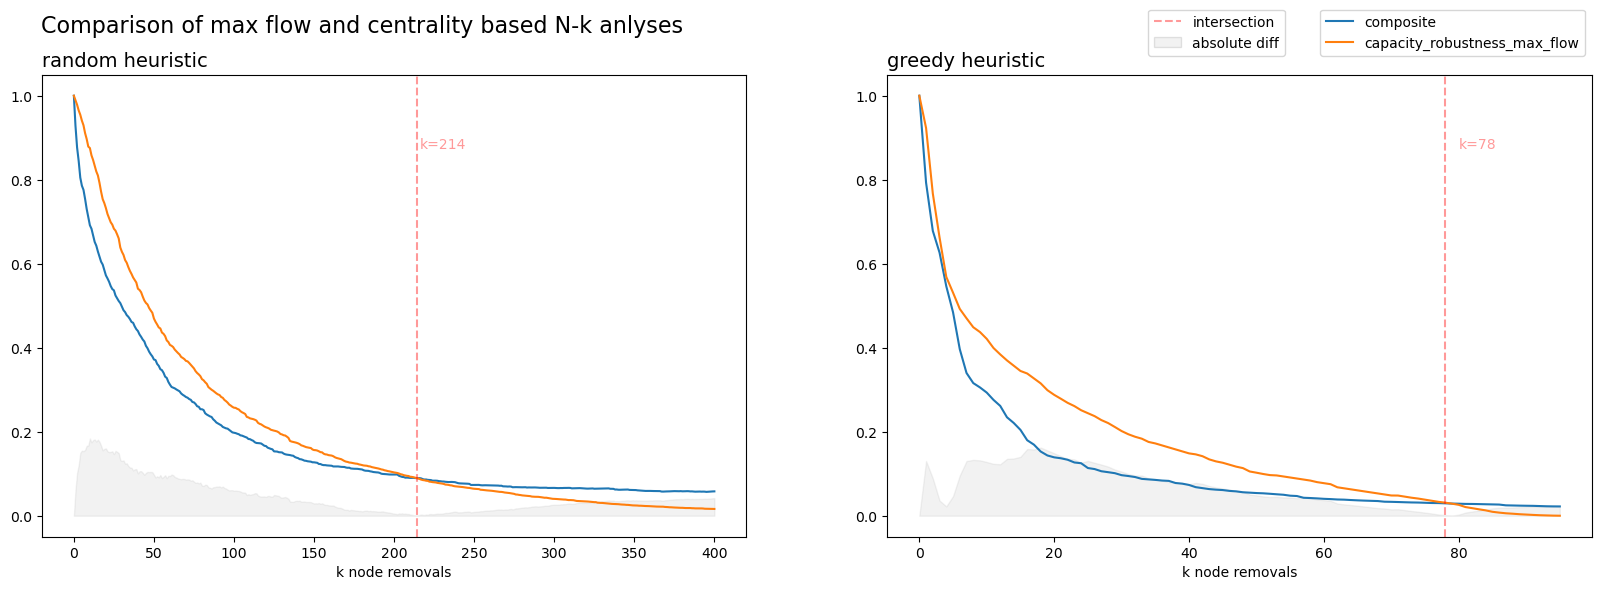

	AUC for composite: 69.32  							          AUC for capacity_robustness_max_flow: 78.5
	composite: [max ROC: 0.06360, avg ROC: 0.06360]    					  capacity_robustness_max_flow: [max ROC: 0.06909, avg ROC: 0.06908]

	AUC for composite: 11.36  							          AUC for capacity_robustness_max_flow: 16.95
	composite: [max ROC: 1.30234, avg ROC: 1.29857]    					  capacity_robustness_max_flow: [max ROC: 0.98839, avg ROC: 0.98692]



In [4]:
utils.plot_metrics([centrality_random_node_removal_df, centrality_greedy_node_removal_df], [max_flow_random_node_removal_df, max_flow_greedy_node_removal_df], 'composite', 'capacity_robustness_max_flow')

In [5]:
utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)

20 common entity removals
95 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 918.0
Variance of index differences for random (averaged) node removal: 11591.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
0,INET_N_1219,4,4,0
14,INET_N_72,9,9,0
18,INET_N_314,14,15,1
15,INET_N_1545,5,3,2
17,INET_N_272,23,16,7
8,N_kremenchuk,21,31,10
19,INET_N_999,62,72,10
13,INET_N_966,30,18,12
6,INET_N_519,31,45,14
1,NO_N_32,16,34,18


### Edge

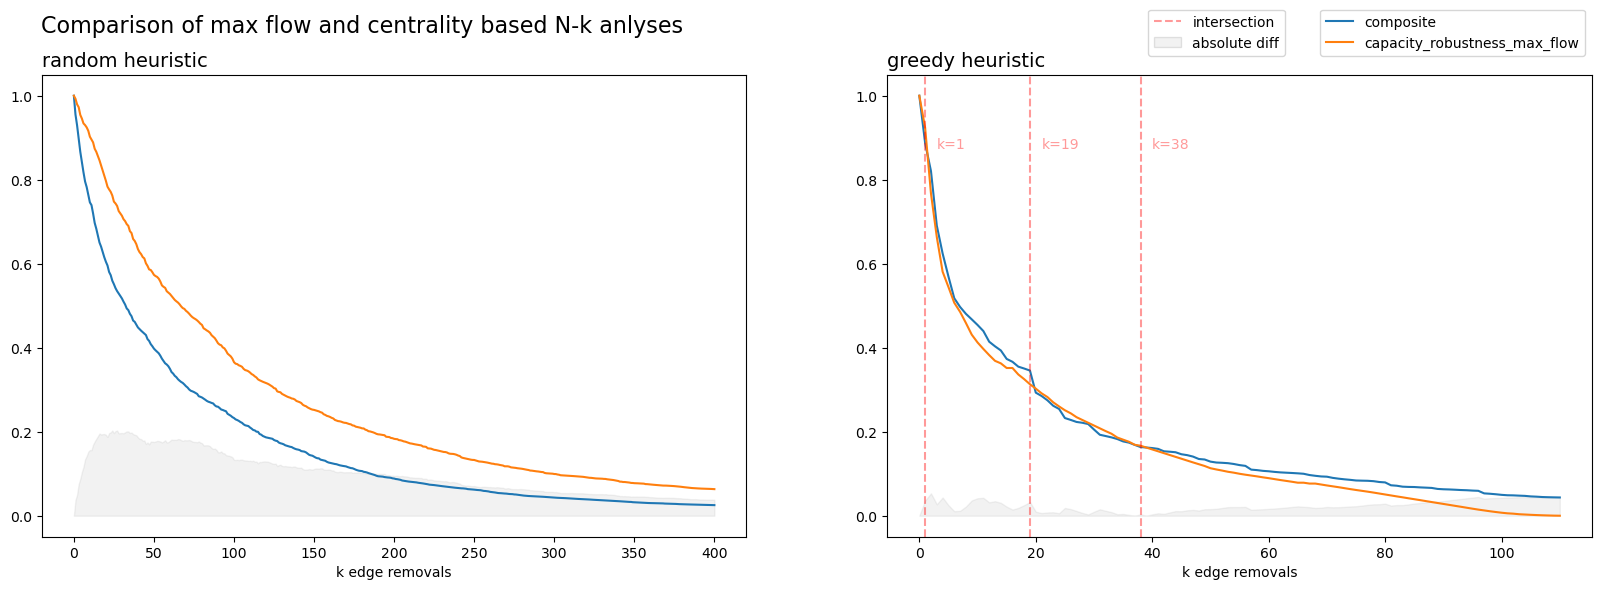

	AUC for composite: 69.21  							          AUC for capacity_robustness_max_flow: 109.5
	composite: [max ROC: 0.06019, avg ROC: 0.06018]    					  capacity_robustness_max_flow: [max ROC: 0.05345, avg ROC: 0.05344]

	AUC for composite: 20.54  							          AUC for capacity_robustness_max_flow: 18.36
	composite: [max ROC: 0.83313, avg ROC: 0.83190]    					  capacity_robustness_max_flow: [max ROC: 0.76229, avg ROC: 0.76137]



In [6]:
utils.plot_metrics([centrality_random_edge_removal_df, centrality_greedy_edge_removal_df], [max_flow_random_edge_removal_df, max_flow_greedy_edge_removal_df], 'composite', 'capacity_robustness_max_flow')

In [7]:
utils.common_entities(centrality_greedy_edge_removal_df, max_flow_greedy_edge_removal_df)

19 common entity removals
110 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 2021.0
Variance of index differences for random (averaged) edge removal: 11199.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
2,"(INET_N_1219, INET_N_870)",3,4,1
6,"(INET_N_72, INET_N_1551)",21,20,1
18,"(NO_N_5, NO_N_4)",5,1,4
8,"(INET_N_992, INET_N_295)",14,7,7
12,"(INET_N_1573, INET_N_1389)",17,10,7
3,"(INET_N_435, INET_N_889)",34,23,11
7,"(INET_N_1630, INET_N_301)",22,34,12
10,"(INET_N_1545, INET_N_151)",15,3,12
13,"(INET_N_138, INET_N_416)",27,49,22
1,"(NO_N_12, NO_N_13)",48,25,23


# Greedy translation

In [16]:
# TODO: add custom plots
# TODO: add stats/info

In [17]:
centrality_greedily_removed_nodes_lst = centrality_greedy_node_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_nodes_lst = max_flow_greedy_node_removal_df['removed_entity'].dropna().tolist()

centrality_greedily_removed_edges_lst = centrality_greedy_edge_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_edges_lst = max_flow_greedy_edge_removal_df['removed_entity'].dropna().tolist()
centrality_greedily_removed_edges_lst = utils.fix_centrality_edge([tuple(e) for e in centrality_greedily_removed_edges_lst])
max_flow_greedily_removed_edges_lst = list(set([tuple(e) for e in max_flow_greedily_removed_edges_lst]))

[('INET_N_1620', 'INET_N_1637'), ('INET_N_1199', 'INET_N_741'), ('INET_N_1219', 'INET_N_870'), ('INET_N_1559', 'INET_N_890'), ('NO_N_5', 'NO_N_4'), ('INET_N_1150', 'INET_N_1030'), ('INET_N_1547', 'INET_N_475'), ('INET_N_1203', 'INET_N_1017'), ('INET_N_1113', 'INET_N_698'), ('INET_N_1149', 'INET_N_1037'), ('INET_N_1572', 'INET_N_1663'), ('INET_N_82', 'INET_N_1336'), ('INET_N_987', 'INET_N_1451'), ('INET_N_992', 'INET_N_295'), ('INET_N_1545', 'INET_N_151'), ('INET_N_1231', 'INET_N_658'), ('INET_N_1573', 'INET_N_1389'), ('INET_N_40', 'INET_N_143'), ('INET_N_1239', 'INET_N_1309'), ('INET_N_1325', 'INET_N_1084'), ('INET_N_72', 'INET_N_1551'), ('INET_N_1630', 'INET_N_301'), ('INET_N_82', 'INET_N_973'), ('INET_N_161', 'INET_N_1627'), ('INET_N_957', 'INET_N_988'), ('INET_N_285', 'INET_N_1261'), ('INET_N_138', 'INET_N_416'), ('INET_N_752', 'INET_N_952'), ('INET_N_1630', 'INET_N_580'), ('INET_N_632', 'INET_N_11'), ('NO_N_1', 'NO_N_32'), ('INET_N_1570', 'INET_N_1263'), ('INET_N_1186', 'INET_N_314

### Max flow N-k analysis applied to centrality analysis results

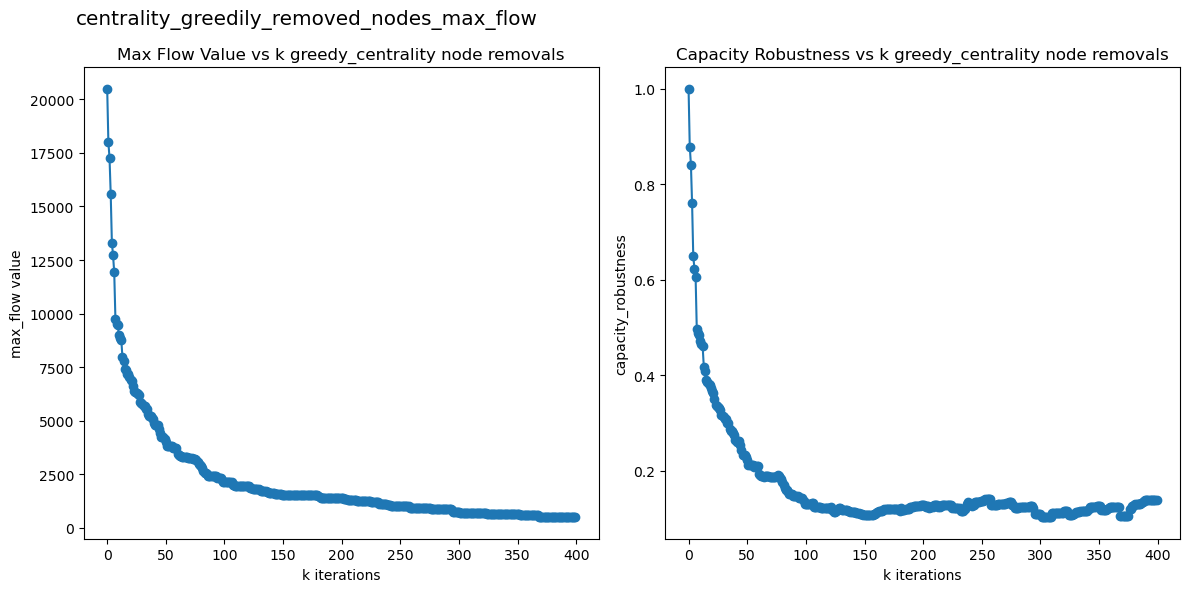

In [18]:
# centrality_greedily_removed_nodes_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='node', greedy_centrality_lst=centrality_greedily_removed_nodes_lst)
# centrality_greedily_removed_nodes_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
utils_max_flow.plot_biplot(centrality_greedily_removed_nodes_max_flow_df, 'centrality_greedily_removed_nodes_max_flow')

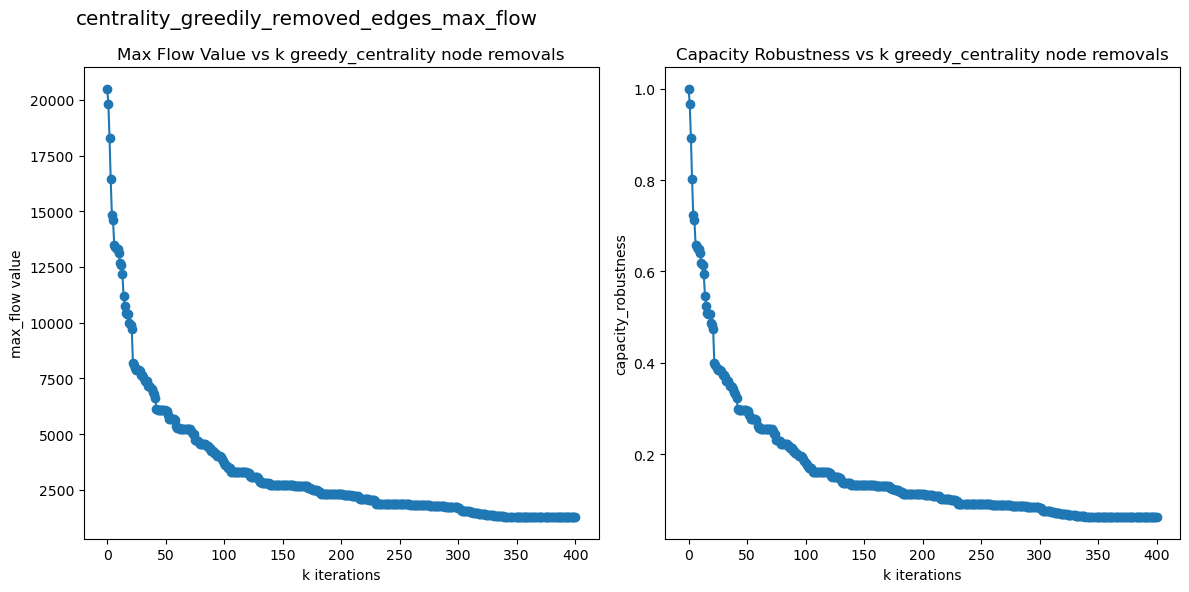

In [19]:
# centrality_greedily_removed_edges_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='edge', greedy_centrality_lst=centrality_greedily_removed_edges_lst)
# centrality_greedily_removed_edges_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
utils_max_flow.plot_biplot(centrality_greedily_removed_edges_max_flow_df, 'centrality_greedily_removed_edges_max_flow')

### Centrality N-k analysis applied to max flow analysis results

In [20]:
# max_flow_greedily_removed_nodes_centrality_df, _ = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='node', greedy_max_flow_lst=max_flow_greedily_removed_nodes_lst)
# max_flow_greedily_removed_nodes_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')

In [21]:
# max_flow_greedily_removed_edges_centrality_df, _ = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='edge', greedy_max_flow_lst=max_flow_greedily_removed_edges_lst)
# max_flow_greedily_removed_edges_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')

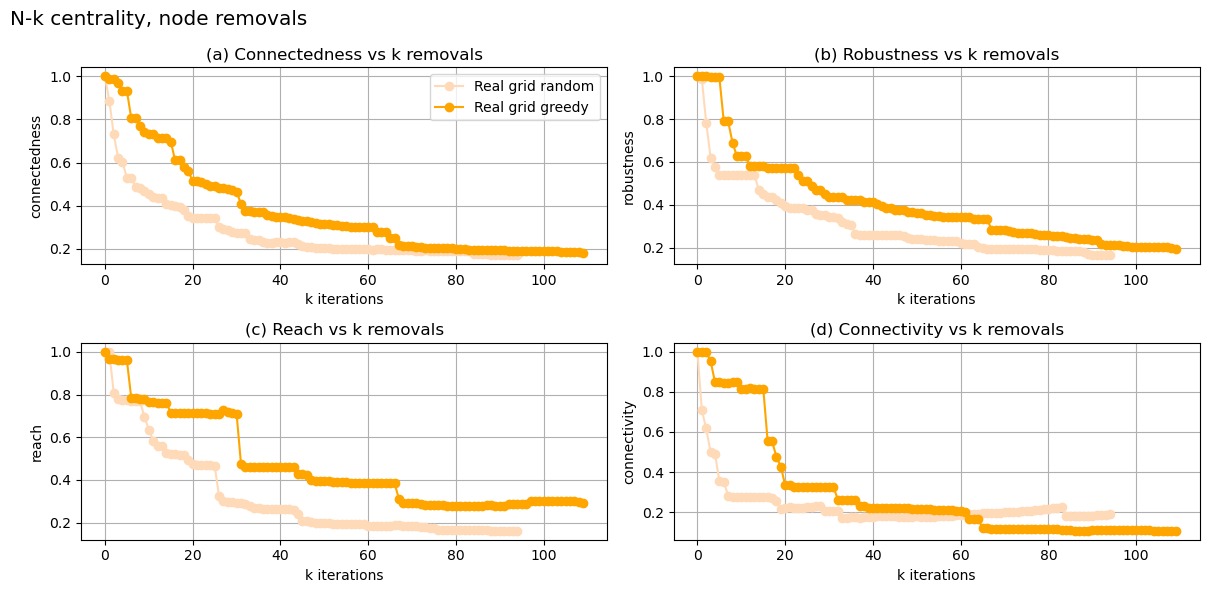

In [22]:
titles = ['(a) Connectedness vs k removals', '(b) Robustness vs k removals', '(c) Reach vs k removals', '(d) Connectivity vs k removals']
utils_centrality.plot_connectedness_fourway([max_flow_greedily_removed_nodes_centrality_df, max_flow_greedily_removed_edges_max_flow_df], titles, 'N-k centrality, node removals')